In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ipywidgets import interact
import numpy as np
%matplotlib inline

### Explicación del DataSet


__clientnum:__ ID único del cliente. (Nominal)

__Client_stayed:__ Si el cliente se quedó con el banco o no. 1 = Se quedó, 2 = No se quedó. (Nominal)

__gender:__ Sexo del cliente. (Nominal)

__dependent_count:__ Número de dependientes económicos del cliente. (Razón)

__education_level:__ Nivel máximo de estudios. (Ordinal)

__marital_status:__ Estado civil. (Nominal)

__income_category:__ Categoría de sus ingresos. Cantidades expresadas en dls. (Ordinal)

__card_category:__ Tipo de tarjeta. (Ordinal)

__months_on_book:__ Meses que ha estado con el banco. (Razón)

__total_relationship_count:__ Número de productos que tiene con el banco. (Razón)

__months_inactive_12_mon:__ Meses de inactividad con el banco. (Razón)

__contacts_count_12_mon:__ Veces que ha contactado al banco vía telefónica. (Razón)

__credit_limit:__ Límite del crédito.  Cantidades expresadas en dls. (Razón)

__total_revolving_bal:__ Total de su deuda.  Cantidades expresadas en dls. (Razón)

__total_trans_amt:__ Dinero total transaccionado.  Cantidades expresadas en dls. (Razón)

__total_trans_ct:__ Número de transacciones hechas. (Razón)

In [2]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv('banco.csv')
df.head()

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28


In [4]:
df.describe()

,clientnum,client_stayed,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.839340,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,4404.086304,64.858695
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,3397.129254,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,510.000000,10.000000
25%,7.130368e+08,1.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,2155.500000,45.000000
50%,7.179264e+08,1.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3899.000000,67.000000
75%,7.731435e+08,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,4741.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,18484.000000,139.000000


In [5]:
df_backup = df.copy()

In [6]:
# lista de nombres de columnas
col = df.columns
col 

Index(['clientnum', 'client_stayed', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_trans_amt', 'total_trans_ct'],
      dtype='object')

## Exploración de cantidad de muestras por categoría, duplicados y faltantes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   client_stayed             10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

##### Definición de tipo de variable

In [8]:
nominales = ['client_stayed', 'gender', 'marital_status'] # Sin client_num
ordinales = ['education_level', 'income_category', 'card_category'] 
intervalo = []
razon = ['customer_age','dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon',
        'credit_limit', 'total_revolving_bal', 'total_trans_amt', 'total_trans_ct']

In [9]:
for i in nominales + ordinales: 
    df[i] = df[i].astype('category')
    
for i in nominales + ordinales:
    print(i)
    #df[i].value_counts()
    df[i].value_counts(normalize = True) # Saca la proporción
    print()

client_stayed


client_stayed
1    0.83934
0    0.16066
Name: proportion, dtype: float64


gender


gender
F    0.529081
M    0.470919
Name: proportion, dtype: float64


marital_status


marital_status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: proportion, dtype: float64


education_level


education_level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: proportion, dtype: float64


income_category


income_category
1666.6666666666667    0.351634
4166.666666666667     0.176755
8333.333333333334     0.151575
5833.333333333333     0.138442
Unknown               0.109805
10000.0               0.071788
Name: proportion, dtype: float64


card_category


card_category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: proportion, dtype: float64

In [10]:
df[df.duplicated()]
num_duplicados = df.duplicated(keep=False).sum()
print("Número de duplicados:", num_duplicados)

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct


Número de duplicados: 0


#### Obervaciones de faltantes y duplicados

+ No se encontraron duplicados en el DataSet
+ No se detectan valores nulos, sin embargo, tenemos un alto grado de clientes clasificados "Unknown" en las categorías de "marital_status", "education_level", e "income_category" que procederemos a dar tratamiento más adelante.

### Conversión a Dummy y a escala ordinal

In [11]:
df_dum = pd.get_dummies(df[['gender', 'marital_status']], drop_first=False) # Afecta que una sea k y la otra k-1?
df = pd.concat([df, df_dum], axis=1)
df['client_stayed']= pd.to_numeric(df['client_stayed'])
df

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,...,12691.0,777,1144,42,False,True,False,True,False,False
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,...,8256.0,864,1291,33,True,False,False,False,True,False
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,...,3418.0,0,1887,20,False,True,False,True,False,False
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,...,3313.0,2517,1171,20,True,False,False,False,False,True
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,...,4716.0,0,816,28,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,...,4003.0,1851,15476,117,False,True,False,False,True,False
10123,710638233,0,41,M,2,Unknown,Divorced,4166.666666666667,Blue,25,...,4277.0,2186,8764,69,False,True,True,False,False,False
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,...,5409.0,0,10291,60,True,False,False,True,False,False
10125,717406983,0,30,M,2,Graduate,Unknown,4166.666666666667,Blue,36,...,5281.0,0,8395,62,False,True,False,False,False,True


In [12]:
x = [{'Unknown': 1, 'Uneducated': 2, 'High School': 3,'College': 4,'Graduate': 5, 'Post-Graduate': 6, 'Doctorate': 7},
    {'Unknown': 1, '1666.6666666666667': 2, '4166.666666666667': 3, '8333.333333333334': 4, '5833.333333333333': 6, '10000.0': 7},
    {'Blue': 1, 'Silver': 2, 'Gold': 3,'Platinum': 4}]

for j,i in enumerate (ordinales):
    df[i + '_ordinal_level_scale'] = df[i]
    # df[i + '_ordinal_level_scale'] = pd.Categorical(df[i + '_ordinal_level_scale'])
    y = x[j]
    df[i + '_ordinal_level_scale'] = df[i + '_ordinal_level_scale'].map(y) 
    df[i + '_ordinal_level_scale'] = pd.to_numeric(df[i + '_ordinal_level_scale'])
df

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_trans_ct,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,education_level_ordinal_level_scale,income_category_ordinal_level_scale,card_category_ordinal_level_scale
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,...,42,False,True,False,True,False,False,3,6,1
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,...,33,True,False,False,False,True,False,5,2,1
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,...,20,False,True,False,True,False,False,5,4,1
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,...,20,True,False,False,False,False,True,3,2,1
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,...,28,False,True,False,True,False,False,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,...,117,False,True,False,False,True,False,5,3,1
10123,710638233,0,41,M,2,Unknown,Divorced,4166.666666666667,Blue,25,...,69,False,True,True,False,False,False,1,3,1
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,...,60,True,False,False,True,False,False,3,2,1
10125,717406983,0,30,M,2,Graduate,Unknown,4166.666666666667,Blue,36,...,62,False,True,False,False,False,True,5,3,1


In [13]:
nombre_archivo = "Banco_dum.csv"

# Utiliza el método to_csv para guardar el DataFrame en un archivo CSV
df.to_csv(nombre_archivo, index=False) 

In [14]:
df = pd.read_csv('Banco_Dum.csv')
df.head()

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_trans_ct,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,education_level_ordinal_level_scale,income_category_ordinal_level_scale,card_category_ordinal_level_scale
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,...,42,False,True,False,True,False,False,3,6,1
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,...,33,True,False,False,False,True,False,5,2,1
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,...,20,False,True,False,True,False,False,5,4,1
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,...,20,True,False,False,False,False,True,3,2,1
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,...,28,False,True,False,True,False,False,2,6,1


In [15]:
df.columns

Index(['clientnum', 'client_stayed', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_trans_amt', 'total_trans_ct', 'gender_F', 'gender_M',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown',
       'education_level_ordinal_level_scale',
       'income_category_ordinal_level_scale',
       'card_category_ordinal_level_scale'],
      dtype='object')

In [16]:
nominales = ['client_stayed', 'gender', 'marital_status'] # Sin client_num
ordinales = ['education_level', 'income_category', 'card_category'] 
intervalo = []
razon = ['customer_age','dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon',
        'credit_limit', 'total_revolving_bal', 'total_trans_amt', 'total_trans_ct']

In [17]:
for i in nominales + ordinales:
    print(i)
    df[i].unique()
    print()

client_stayed


array([1, 0], dtype=int64)


gender


array(['M', 'F'], dtype=object)


marital_status


array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)


education_level


array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)


income_category


array(['5833.333333333333', '1666.6666666666667', '8333.333333333334',
       '4166.666666666667', '10000.0', 'Unknown'], dtype=object)


card_category


array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [18]:
for i in nominales + ordinales:
    print(i)
    df[i].value_counts(normalize = True) # Saca la proporción
    print()

client_stayed


client_stayed
1    0.83934
0    0.16066
Name: proportion, dtype: float64


gender


gender
F    0.529081
M    0.470919
Name: proportion, dtype: float64


marital_status


marital_status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: proportion, dtype: float64


education_level


education_level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: proportion, dtype: float64


income_category


income_category
1666.6666666666667    0.351634
4166.666666666667     0.176755
8333.333333333334     0.151575
5833.333333333333     0.138442
Unknown               0.109805
10000.0               0.071788
Name: proportion, dtype: float64


card_category


card_category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: proportion, dtype: float64

In [19]:
marital_1 = df.loc[df['marital_status'] != 'Unknown']
marital_1

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_trans_ct,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,education_level_ordinal_level_scale,income_category_ordinal_level_scale,card_category_ordinal_level_scale
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,...,42,False,True,False,True,False,False,3,6,1
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,...,33,True,False,False,False,True,False,5,2,1
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,...,20,False,True,False,True,False,False,5,4,1
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,...,28,False,True,False,True,False,False,2,6,1
5,713061558,1,44,M,2,Graduate,Married,4166.666666666667,Blue,36,...,24,False,True,False,True,False,False,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,713899383,1,56,F,1,Graduate,Single,1666.6666666666667,Blue,50,...,120,True,False,False,False,True,False,5,2,1
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,...,117,False,True,False,False,True,False,5,3,1
10123,710638233,0,41,M,2,Unknown,Divorced,4166.666666666667,Blue,25,...,69,False,True,True,False,False,False,1,3,1
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,...,60,True,False,False,True,False,False,3,2,1


In [20]:
df['client_stayed'].value_counts(normalize = True)

client_stayed
1    0.83934
0    0.16066
Name: proportion, dtype: float64

In [21]:
marital_1['client_stayed'].value_counts(normalize = True)

client_stayed
1    0.840264
0    0.159736
Name: proportion, dtype: float64

In [22]:
education_level_1 = df.loc[df['education_level'] != 'Unknown']
education_level_1

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_trans_ct,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,education_level_ordinal_level_scale,income_category_ordinal_level_scale,card_category_ordinal_level_scale
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,...,42,False,True,False,True,False,False,3,6,1
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,...,33,True,False,False,False,True,False,5,2,1
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,...,20,False,True,False,True,False,False,5,4,1
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,...,20,True,False,False,False,False,True,3,2,1
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,...,28,False,True,False,True,False,False,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,713899383,1,56,F,1,Graduate,Single,1666.6666666666667,Blue,50,...,120,True,False,False,False,True,False,5,2,1
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,...,117,False,True,False,False,True,False,5,3,1
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,...,60,True,False,False,True,False,False,3,2,1
10125,717406983,0,30,M,2,Graduate,Unknown,4166.666666666667,Blue,36,...,62,False,True,False,False,False,True,5,3,1


In [23]:
df['client_stayed'].value_counts(normalize = True)

client_stayed
1    0.83934
0    0.16066
Name: proportion, dtype: float64

In [24]:
education_level_1['client_stayed'].value_counts(normalize = True)

client_stayed
1    0.84073
0    0.15927
Name: proportion, dtype: float64

In [25]:
income_category_1 = df.loc[df['income_category'] != 'Unknown']
income_category_1

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_trans_ct,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,education_level_ordinal_level_scale,income_category_ordinal_level_scale,card_category_ordinal_level_scale
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,...,42,False,True,False,True,False,False,3,6,1
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,...,33,True,False,False,False,True,False,5,2,1
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,...,20,False,True,False,True,False,False,5,4,1
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,...,20,True,False,False,False,False,True,3,2,1
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,...,28,False,True,False,True,False,False,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,...,117,False,True,False,False,True,False,5,3,1
10123,710638233,0,41,M,2,Unknown,Divorced,4166.666666666667,Blue,25,...,69,False,True,True,False,False,False,1,3,1
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,...,60,True,False,False,True,False,False,3,2,1
10125,717406983,0,30,M,2,Graduate,Unknown,4166.666666666667,Blue,36,...,62,False,True,False,False,False,True,5,3,1


In [26]:
df['client_stayed'].value_counts(normalize = True)

client_stayed
1    0.83934
0    0.16066
Name: proportion, dtype: float64

In [27]:
income_category_1['client_stayed'].value_counts(normalize = True)

client_stayed
1    0.840266
0    0.159734
Name: proportion, dtype: float64

In [28]:
suma = df.loc[(df['marital_status'] != 'Unknown') & (df['education_level'] != 'Unknown') & (df['income_category'] != 'Unknown')]
suma

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_trans_ct,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,education_level_ordinal_level_scale,income_category_ordinal_level_scale,card_category_ordinal_level_scale
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,...,42,False,True,False,True,False,False,3,6,1
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,...,33,True,False,False,False,True,False,5,2,1
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,...,20,False,True,False,True,False,False,5,4,1
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,...,28,False,True,False,True,False,False,2,6,1
5,713061558,1,44,M,2,Graduate,Married,4166.666666666667,Blue,36,...,24,False,True,False,True,False,False,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,1,54,M,1,High School,Single,5833.333333333333,Blue,34,...,114,False,True,False,False,True,False,3,6,1
10121,713899383,1,56,F,1,Graduate,Single,1666.6666666666667,Blue,50,...,120,True,False,False,False,True,False,5,2,1
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,...,117,False,True,False,False,True,False,5,3,1
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,...,60,True,False,False,True,False,False,3,2,1


In [29]:
df['client_stayed'].value_counts(normalize = True)

client_stayed
1    0.83934
0    0.16066
Name: proportion, dtype: float64

In [30]:
suma['client_stayed'].value_counts(normalize = True)

client_stayed
1    0.842819
0    0.157181
Name: proportion, dtype: float64

In [31]:
suma.columns

Index(['clientnum', 'client_stayed', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_trans_amt', 'total_trans_ct', 'gender_F', 'gender_M',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown',
       'education_level_ordinal_level_scale',
       'income_category_ordinal_level_scale',
       'card_category_ordinal_level_scale'],
      dtype='object')

In [32]:
suma = suma.drop('marital_status_Unknown', axis = 1)

In [33]:
x = [{'Uneducated': 1, 'High School': 2,'College': 3,'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}]


suma['education_level' + '_ordinal_level_scale'] = suma['education_level']
# df[i + '_ordinal_level_scale'] = pd.Categorical(df[i + '_ordinal_level_scale'])
y = x[0]
suma['education_level' + '_ordinal_level_scale'] = suma['education_level' + '_ordinal_level_scale'].map(y) 
suma['education_level' + '_ordinal_level_scale'] = pd.to_numeric(suma['education_level' + '_ordinal_level_scale'])
suma

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_trans_amt,total_trans_ct,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,education_level_ordinal_level_scale,income_category_ordinal_level_scale,card_category_ordinal_level_scale
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,...,1144,42,False,True,False,True,False,2,6,1
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,...,1291,33,True,False,False,False,True,4,2,1
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,...,1887,20,False,True,False,True,False,4,4,1
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,...,816,28,False,True,False,True,False,1,6,1
5,713061558,1,44,M,2,Graduate,Married,4166.666666666667,Blue,36,...,1088,24,False,True,False,True,False,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,1,54,M,1,High School,Single,5833.333333333333,Blue,34,...,15577,114,False,True,False,False,True,2,6,1
10121,713899383,1,56,F,1,Graduate,Single,1666.6666666666667,Blue,50,...,14596,120,True,False,False,False,True,4,2,1
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,...,15476,117,False,True,False,False,True,4,3,1
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,...,10291,60,True,False,False,True,False,2,2,1


In [34]:
suma = pd.DataFrame(suma)

In [35]:
suma['income_category'] = pd.to_numeric(suma['income_category'])
suma['income_category'] = suma['income_category'].round(2)
suma['income_category'] = pd.Categorical(suma['income_category'])

In [36]:
dfL = suma
dfL

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_trans_amt,total_trans_ct,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,education_level_ordinal_level_scale,income_category_ordinal_level_scale,card_category_ordinal_level_scale
0,768805383,1,45,M,3,High School,Married,5833.33,Blue,39,...,1144,42,False,True,False,True,False,2,6,1
1,818770008,1,49,F,5,Graduate,Single,1666.67,Blue,44,...,1291,33,True,False,False,False,True,4,2,1
2,713982108,1,51,M,3,Graduate,Married,8333.33,Blue,36,...,1887,20,False,True,False,True,False,4,4,1
4,709106358,1,40,M,3,Uneducated,Married,5833.33,Blue,21,...,816,28,False,True,False,True,False,1,6,1
5,713061558,1,44,M,2,Graduate,Married,4166.67,Blue,36,...,1088,24,False,True,False,True,False,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,1,54,M,1,High School,Single,5833.33,Blue,34,...,15577,114,False,True,False,False,True,2,6,1
10121,713899383,1,56,F,1,Graduate,Single,1666.67,Blue,50,...,14596,120,True,False,False,False,True,4,2,1
10122,772366833,1,50,M,2,Graduate,Single,4166.67,Blue,40,...,15476,117,False,True,False,False,True,4,3,1
10124,716506083,0,44,F,1,High School,Married,1666.67,Blue,36,...,10291,60,True,False,False,True,False,2,2,1


## Comprobación

In [37]:
dfL.columns

Index(['clientnum', 'client_stayed', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_trans_amt', 'total_trans_ct', 'gender_F', 'gender_M',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'education_level_ordinal_level_scale',
       'income_category_ordinal_level_scale',
       'card_category_ordinal_level_scale'],
      dtype='object')

In [38]:
nombre_archivo = "Banco_L.csv"

# Utiliza el método to_csv para guardar el DataFrame en un archivo CSV
dfL.to_csv(nombre_archivo, index=False)  # El argumento index=False evita que se guarde el índice del DataFrame en el archivo CSV

In [39]:
df = pd.read_csv("Banco_L.csv")
df.head()

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_trans_amt,total_trans_ct,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,education_level_ordinal_level_scale,income_category_ordinal_level_scale,card_category_ordinal_level_scale
0,768805383,1,45,M,3,High School,Married,5833.33,Blue,39,...,1144,42,False,True,False,True,False,2,6,1
1,818770008,1,49,F,5,Graduate,Single,1666.67,Blue,44,...,1291,33,True,False,False,False,True,4,2,1
2,713982108,1,51,M,3,Graduate,Married,8333.33,Blue,36,...,1887,20,False,True,False,True,False,4,4,1
3,709106358,1,40,M,3,Uneducated,Married,5833.33,Blue,21,...,816,28,False,True,False,True,False,1,6,1
4,713061558,1,44,M,2,Graduate,Married,4166.67,Blue,36,...,1088,24,False,True,False,True,False,4,3,1


In [40]:
df.columns

columnas = ['customer_age', 'dependent_count', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_trans_amt', 'total_trans_ct', 'gender_F', 'gender_M',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'education_level_ordinal_level_scale',
       'income_category_ordinal_level_scale',
       'card_category_ordinal_level_scale']

Index(['clientnum', 'client_stayed', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_trans_amt', 'total_trans_ct', 'gender_F', 'gender_M',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'education_level_ordinal_level_scale',
       'income_category_ordinal_level_scale',
       'card_category_ordinal_level_scale'],
      dtype='object')

In [41]:
df_pca = df[columnas]

nombre_archivo = "Banco_PCA.csv"
# Utiliza el método to_csv para guardar el DataFrame en un archivo CSV
df_pca.to_csv(nombre_archivo, index=False) 

df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_age                         7081 non-null   int64  
 1   dependent_count                      7081 non-null   int64  
 2   months_on_book                       7081 non-null   int64  
 3   total_relationship_count             7081 non-null   int64  
 4   months_inactive_12_mon               7081 non-null   int64  
 5   contacts_count_12_mon                7081 non-null   int64  
 6   credit_limit                         7081 non-null   float64
 7   total_revolving_bal                  7081 non-null   int64  
 8   total_trans_amt                      7081 non-null   int64  
 9   total_trans_ct                       7081 non-null   int64  
 10  gender_F                             7081 non-null   bool   
 11  gender_M                      

In [42]:
#df_pca["gender_F"].dtype

## Realizar PCA

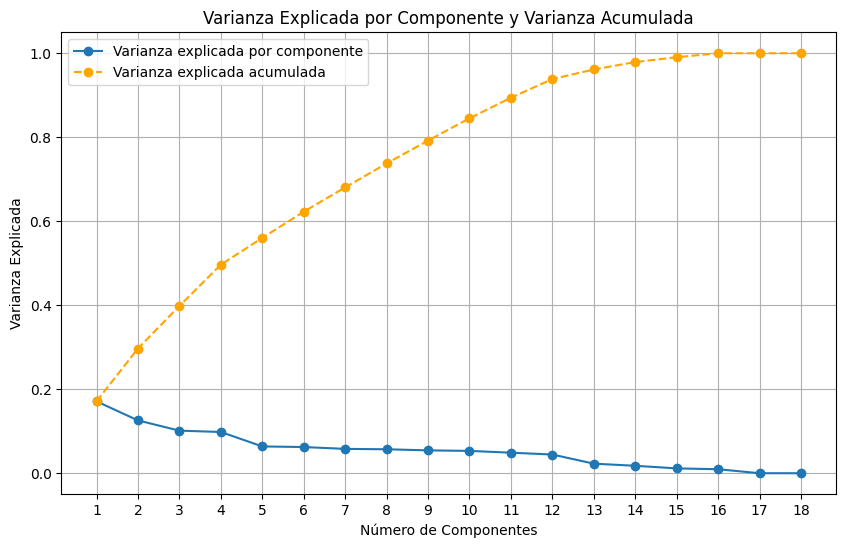

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar las columnas numéricas para el PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Crear un objeto PCA sin especificar el número de componentes
pca = PCA()

# Aplicar PCA a los datos estandarizados
pca.fit(df_scaled)

# Obtener la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
varianza_acumulada = np.cumsum(varianza_explicada)

# Graficar la varianza explicada y acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada, marker='o', label='Varianza explicada por componente')
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='orange', label='Varianza explicada acumulada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente y Varianza Acumulada')
plt.legend()
plt.grid(True)
plt.xticks(range(1, len(varianza_explicada) + 1))
plt.show();


In [44]:
varianza_explicada

array([1.71160626e-01, 1.25773492e-01, 1.01342662e-01, 9.82109720e-02,
       6.37865760e-02, 6.23389936e-02, 5.79440641e-02, 5.70302388e-02,
       5.43929876e-02, 5.31376488e-02, 4.89068174e-02, 4.44925417e-02,
       2.27661777e-02, 1.76932602e-02, 1.15268602e-02, 9.49608166e-03,
       5.08602477e-32, 1.30608591e-32])

In [45]:
# Hacemos PCA con 10 componentes

# Crear un objeto PCA con el número de componentes deseados
pca = PCA(10) # El 10 por 10 componentes

# Aplicar PCA a todos los datos (numéricos estandarizados)
componentes_principales = pca.fit_transform(df_scaled)

# Crear un nuevo DataFrame con los componentes principales
columnas = [f"Componente_{i+1}" for i in range(10)]
df_componentes = pd.DataFrame(data=componentes_principales, columns=columnas)
df_componentes

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10
0,1.709091,-2.164630,-0.646982,0.267395,-0.137282,-0.184157,-0.556002,0.186160,0.516603,-1.507895
1,-1.699370,-0.558345,0.504452,-1.754712,-0.493553,0.794316,-1.467126,-2.085888,0.755405,-1.311960
2,0.652009,-2.054153,-0.307213,0.541776,-0.049342,-0.879124,-0.174566,-2.267105,0.331057,-1.452272
3,1.257971,-1.811504,-2.517834,0.040713,0.000699,-1.113982,-0.595027,-0.743000,1.679536,-1.351788
4,0.458423,-1.973509,-0.744818,0.480964,-0.166787,-0.664369,-0.509968,-0.696075,-0.753932,-0.909110
...,...,...,...,...,...,...,...,...,...,...
7076,2.212177,3.069814,1.329601,0.359541,0.490126,-2.271714,-1.477106,0.391190,-0.064108,1.010349
7077,-1.456372,2.950657,2.667970,0.232870,-0.141089,-0.690670,0.403059,0.988687,-1.811015,-1.586053
7078,1.040006,3.176031,1.307427,0.345012,0.101064,-1.717227,0.087356,0.468930,-1.230334,0.225077
7079,-1.678604,-0.096460,-0.186483,1.018199,-0.446763,0.392186,1.649622,1.909458,-0.266463,-0.345293


In [46]:
# Agregamos la columna variable a predecir
df_componentes['client_stayed'] = df['client_stayed']
df_componentes

nombre_archivo = "Banco_PCA_Scaled.csv"
# Utiliza el método to_csv para guardar el DataFrame en un archivo CSV
df_componentes.to_csv(nombre_archivo, index=False) 

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10,client_stayed
0,1.709091,-2.164630,-0.646982,0.267395,-0.137282,-0.184157,-0.556002,0.186160,0.516603,-1.507895,1
1,-1.699370,-0.558345,0.504452,-1.754712,-0.493553,0.794316,-1.467126,-2.085888,0.755405,-1.311960,1
2,0.652009,-2.054153,-0.307213,0.541776,-0.049342,-0.879124,-0.174566,-2.267105,0.331057,-1.452272,1
3,1.257971,-1.811504,-2.517834,0.040713,0.000699,-1.113982,-0.595027,-0.743000,1.679536,-1.351788,1
4,0.458423,-1.973509,-0.744818,0.480964,-0.166787,-0.664369,-0.509968,-0.696075,-0.753932,-0.909110,1
...,...,...,...,...,...,...,...,...,...,...,...
7076,2.212177,3.069814,1.329601,0.359541,0.490126,-2.271714,-1.477106,0.391190,-0.064108,1.010349,1
7077,-1.456372,2.950657,2.667970,0.232870,-0.141089,-0.690670,0.403059,0.988687,-1.811015,-1.586053,1
7078,1.040006,3.176031,1.307427,0.345012,0.101064,-1.717227,0.087356,0.468930,-1.230334,0.225077,1
7079,-1.678604,-0.096460,-0.186483,1.018199,-0.446763,0.392186,1.649622,1.909458,-0.266463,-0.345293,0
